# Visualize data from a Marker file - CTRAP

Interact with data from markers.

In [79]:
%matplotlib notebook
import lumicks.pylake as lk
import matplotlib.pyplot as plt
import ipywidgets as widgets
import os

def import_data(path):
    '''
    Import an HDF5 file.
    :param input_path: is the path to the file and must be a string.
    '''
    assert os.path.exists(path), 'Sorry, the path does not exist.'
    marker = lk.File(path)
    return marker

def extract_data(marker):
    trapposition = marker.distance1
    distance = trapposition.data
    time = trapposition.seconds
    trapforce = marker.force2x
    # downsample the HF force to match the LF of the distance
    force = trapforce.downsampled_like(trapposition)
    force = force.data
    #readjust the distance array size to match the len of the downsampled force array
    dif = len(distance)-len(force)
    time = time[0:-dif]
    distance = distance[0:-dif]
    return time, force, distance

def save_DAT(dataset, folder, name):
    outpath = os.path.join(folder,f'{name}.dat')
    df = pd.DataFrame({'Time (s)' : dataset[0], 'Distance (um)' : dataset[1], 'Force (pN)' : dataset[2]})
    df.to_csv(outpath, index=False, sep = '\t')

#### Import the file

In [80]:
folder = 'raw_data'
files = [elem for elem in os.listdir(folder) if elem.endswith('.h5')] # get all the markers in the folder
markers = {}

for file in files:
    path = os.path.join(folder, file)
    marker = import_data(path)
    time, force, distance = extract_data(marker)
    markers[file] = {'time':time, 'force':force, 'distance':distance}

The data in this folder was obtained by using the automation script for Reproducible Force Sequence with the following parameters:

name_id = 'lambda_0-55pN'

forces = [0, 55, 0] 

times = [0, 0, 0] 

speeds = [1, 1] 

repetitions = 5 

repeat_in_another_channel = False  

channel_name = 'Protein'  # repeat_in_another_channel is False so this value does not matter

incubation_time = 60  # repeat_in_another_channel is False so this value does not matter 


#### Visualize the data

<IPython.core.display.Javascript object>


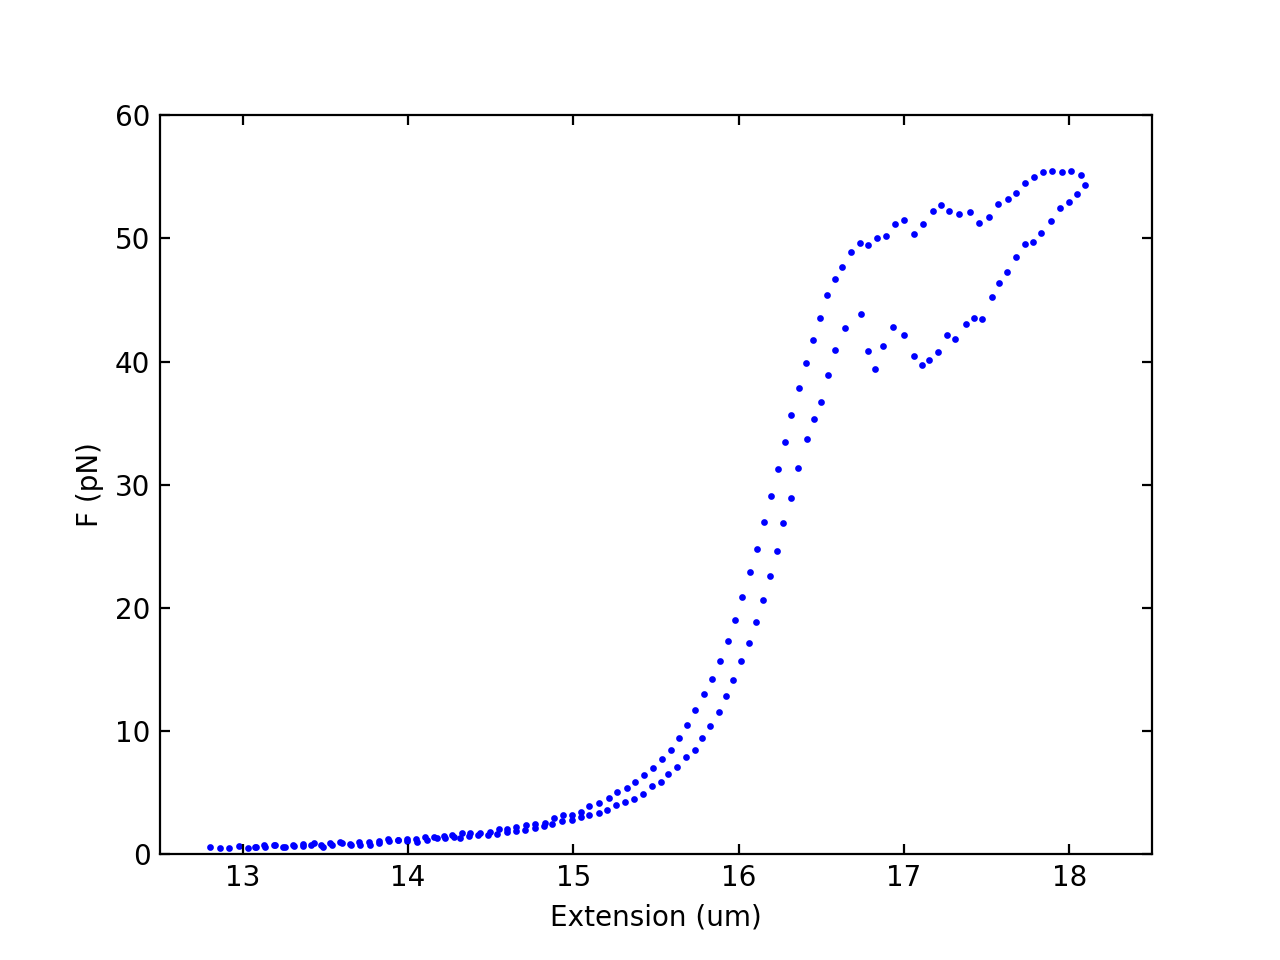

interactive(children=(BoundedIntText(value=1, description='num', max=5, min=1), Output()), _dom_classes=('widg…

<function __main__.update_plot(num)>

In [81]:
fig, axs = plt.subplots()

def update_plot(num):
    axs.clear()
    file = files[num-1]
    data = markers[file]
    x = data['distance']
    y = data['force']
    axs.scatter(x, y, s = 2, c = 'blue')
    axs.set(xlabel = 'Extension (um)', ylabel = 'F (pN)',
            xlim=(12.5, 18.5), ylim=(0, 60))
    axs.tick_params(direction = 'in', top = True, right = True)
    
widgets.interact(update_plot, num = widgets.BoundedIntText(min=1, max=len(files), step=1))